In [ ]:
!pip install Spotipy

In [ ]:
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy import oauth2
import random
from functools import reduce

In [ ]:
!pip install -r requirements.txt

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util


cid ='48a1c43c43924406a14f4ec9d3583b66' # Client ID; copy this from your app created on beta.developer.spotify.com
secret = '45092c99dee94cab946442a479afe242' # Client Secret; copy this from your app
username = 'sanjsarda' # Your Spotify username
redirect_uri = 'https://example.com'

# Once the Authorisation is complete, we just need to `sp` to call the APIs
scope = 'user-top-read user-read-recently-played user-follow-read playlist-modify-public user-library-read playlist-read-collaborative'
token = util.prompt_for_user_token(username, scope, client_id=cid, client_secret=secret, redirect_uri=redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

In [5]:
def get_tracks (sp,genre,popularity=50,limit=100):
    recos=sp.recommendations(seed_genres=genre,limit=limit, min_popularity=popularity)
    track_ids=[]
    for track in recos['tracks']:
        album_id=track['album']['id']
        album_tracks=sp.album_tracks(album_id)
        for track in album_tracks['items']:
            track_ids.append(track['id'])
    return track_ids

In [6]:
x=get_tracks(sp,['acoustic'])

In [7]:
len(x)

1234

In [8]:
def get_user_profile(sp):
    results_favorite= sp.current_user_top_tracks(limit=25, offset=0,time_range='medium_term')
    results_recents= sp.current_user_recently_played(limit=25)
    
    track_name = []
    track_id = []
    artist = []
    artist_id = []
    album = []
    duration = []
    popularity = []
    genres= set()
    
    for i, items in enumerate(results_favorite['items']):
        track_name.append(items['name'])
        track_id.append(items['id'])
        artist.append(items["artists"][0]["name"])
        artist_id.append(items["artists"][0]["id"])
        genres.update(sp.artist(items["artists"][0]["id"])['genres'])
        duration.append(items["duration_ms"])
        album.append(items["album"]["name"])
        popularity.append(items["popularity"])
        
    for i, items in enumerate(results_recents['items']):
        track_name.append(items['track']['name'])
        track_id.append(items['track']['id'])
        artist.append(items['track']["artists"][0]["name"])
        artist_id.append(items['track']["artists"][0]["id"])
        genres.update(sp.artist(items['track']["artists"][0]["id"])['genres'])
        duration.append(items['track']["duration_ms"])
        album.append(items['track']["album"]["name"])
        popularity.append(items['track']["popularity"])
        
        
    df_user = pd.DataFrame({ "track_name": track_name, 
                             "album": album, 
                             "track_id": track_id,
                             "artist": artist, 
                             "artist_id": artist_id,
                             "duration": duration, 
                             "popularity": popularity})
    
    df_user.drop_duplicates(keep='first',inplace=True)
    return df_user, genres

In [42]:
user_profile, user_genres=get_user_profile(sp)

In [43]:
user_profile

,track_name,album,track_id,artist,artist_id,duration,popularity
0,Knew You,Here In Your Bedroom,0WfV9XwpkldKdjzw4qoyAd,Kailee Morgue,245PKF3hKjtxJKIG153kF0,185408,40
1,Flower Shops (feat. Morgan Wallen),Flower Shops (feat. Morgan Wallen),2ccuOtUjIyx3tPcsnpeBzJ,ERNEST,4GGfAshSkqoxpZdoaHm7ky,214405,79
2,Backseat (Kiss Me),Backseat (Kiss Me),7dbnw3cDgeDxOxJJ7QiAiD,Jutes,53fzjsJnjEKkA6TdncuIM4,166060,53
3,He Went To Jared (HARDY feat. Morgan Wallen),He Went To Jared (HARDY feat. Morgan Wallen),25uzAwyPekZtWzlLVvUYNS,HARDY,5QNm7E7RU2m64l6Gliu8Oy,213693,51
4,lie to me,lie to me,4f9IfFvBFm7Gsf1IVEudyf,Tate McRae,45dkTj5sMRSjrmBSBeiHym,177440,70
5,Taste of You,Taste of You,655sojH8GGEteZTBJOFyy7,Rezz,4aKdmOXdUKX07HVd3sGgzw,167606,64
6,One of Them Nights,One of Them Nights,4ks4jp4jGsmffhbUegLG6S,Chris Young,4BYxqVkZyFjtik7crYLg5Q,162520,38
7,Beggin',Conquest,4YeKAwFn69ehnciOfi7Sbf,Madcon,6c4sUNBgdonFJz8Kx2VsGz,218706,65
8,come over,After Midnight,6PGJZEvtlf2EJPu9VLqI3q,12AM,4FHtVj8v4il9h5HRQ4Ib3n,126087,15
9,The Reason,The Reason (15th Anniversary Deluxe),77loZpT5Y5PRP1S451P9Yz,Hoobastank,2MqhkhX4npxDZ62ObR5ELO,232800,83


In [44]:
len(user_genres)

53

In [12]:
def get_genres(sp, track_ids):
    genres= set()
    for track_id in track_ids:
        genres.update(sp.artist(track_id)['genres'])
    return genres  

In [13]:
def genre_consistency(sp,predicted_playlist_genres,user_genres):
    genre_consistency= len(predicted_playlist_genres.intersection(user_genres))/len(predicted_playlist_genres)
    return genre_consistency

In [14]:
def get_recently_played_track_ids(sp):
    results_recents= sp.current_user_recently_played(limit=50)
    track_id = []
    for i, items in enumerate(results_recents['items']):
        track_id.append(items['track']['id'])
    return track_id

In [15]:
def song_newness(sp, predicted_playlist):
    number_of_new_tracks=0
    for track in predicted_playlist:
        if not sp.current_user_saved_tracks_contains([track]) and track not in get_recently_played_track_ids(sp):
            number_of_new_tracks+=1
    return number_of_new_tracks*100/len(predicted_playlist)

In [16]:
genre_consistency(sp,user_genres,user_genres)

1.0

In [17]:
song_newness(sp,user_profile['track_id'])

0.0

## Encoding Audio Features

In [45]:
def fetch_audio_features(sp, df):
    playlist = df[['track_id','track_name', 'artist_id']] 
    index = 0
    audio_features = []
    genres = []
    
    # Make the API request
    while index < playlist.shape[0]:
        audio_features += sp.audio_features(playlist.iloc[index:index + 50, 0])
        index += 50
        
    index = 0
    while index < playlist.shape[0]:
        genres += [sp.artist('spotify:artist:'+ playlist.iloc[index, 2])['genres']]
        index += 1
    
    # Create an empty list to feed in different charactieritcs of the tracks
    features_list = []
    #Create keys-values of empty lists inside nested dictionary for album
    for features in audio_features:
        features_list.append([features['danceability'],
                              features['acousticness'],
                              features['energy'], 
                              features['tempo'],
                              features['instrumentalness'], 
                              features['loudness'],
                              features['liveness'],
                              features['duration_ms'],
                              features['key'],
                              features['valence'],
                              features['speechiness'],
                              features['mode']
                             ])
    
    df_audio_features = pd.DataFrame(features_list, columns=['danceability', 'acousticness', 'energy','tempo', 
                                                             'instrumentalness', 'loudness', 'liveness','duration_ms', 'key',
                                                             'valence', 'speechiness', 'mode',])
    df_audio_features['genres'] = genres
    
    # Create the final df, using the 'track_id' as index for future reference
    df_playlist_audio_features = pd.concat([playlist, df_audio_features], axis=1)
    df_playlist_audio_features.set_index('track_name', inplace=True, drop=True)
    return df_playlist_audio_features

In [46]:
audio_features=fetch_audio_features(sp,user_profile)

In [47]:
audio_features

,track_id,artist_id,danceability,acousticness,energy,tempo,instrumentalness,loudness,liveness,duration_ms,key,valence,speechiness,mode,genres
track_name,,,,,,,,,,,,,,,
Knew You,0WfV9XwpkldKdjzw4qoyAd,245PKF3hKjtxJKIG153kF0,0.624,0.00725,0.562,109.958,0.000003,-6.455,0.0937,185409,0,0.4780,0.0285,1,"[alt z, dark pop, electropop, indie electropop..."
Flower Shops (feat. Morgan Wallen),2ccuOtUjIyx3tPcsnpeBzJ,4GGfAshSkqoxpZdoaHm7ky,0.527,0.11800,0.461,128.153,0.000000,-5.908,0.0831,214405,7,0.2270,0.0269,1,[]
Backseat (Kiss Me),7dbnw3cDgeDxOxJJ7QiAiD,53fzjsJnjEKkA6TdncuIM4,0.750,0.11100,0.548,101.031,0.000000,-7.704,0.0633,166061,2,0.4970,0.0492,1,"[emo rap, sad rap, trap soul]"
He Went To Jared (HARDY feat. Morgan Wallen),25uzAwyPekZtWzlLVvUYNS,5QNm7E7RU2m64l6Gliu8Oy,0.565,0.05400,0.806,140.084,0.000008,-5.110,0.2040,213693,9,0.6830,0.0482,0,[contemporary country]
lie to me,4f9IfFvBFm7Gsf1IVEudyf,45dkTj5sMRSjrmBSBeiHym,0.642,0.01510,0.392,138.065,0.000000,-7.846,0.3520,177440,4,0.0479,0.0372,0,"[alt z, dance pop, pop, post-teen pop]"
Taste of You,655sojH8GGEteZTBJOFyy7,4aKdmOXdUKX07HVd3sGgzw,0.667,0.00640,0.679,100.054,0.000053,-6.616,0.1700,167606,0,0.3200,0.0475,1,"[canadian electronic, edm, electra, electro ho..."
One of Them Nights,4ks4jp4jGsmffhbUegLG6S,4BYxqVkZyFjtik7crYLg5Q,0.521,0.04220,0.883,80.982,0.000000,-3.807,0.1050,162520,1,0.8050,0.0616,1,"[contemporary country, country, country road, ..."
Beggin',4YeKAwFn69ehnciOfi7Sbf,6c4sUNBgdonFJz8Kx2VsGz,0.715,0.02840,0.796,129.040,0.000000,-4.889,0.0658,218707,4,0.4310,0.0534,0,"[dance pop, norwegian hip hop, pop rap]"
come over,6PGJZEvtlf2EJPu9VLqI3q,4FHtVj8v4il9h5HRQ4Ib3n,0.865,0.28900,0.498,108.062,0.000001,-8.311,0.6900,126088,7,0.8080,0.2880,0,"[canadian contemporary r&b, sad rap, trap soul]"


In [48]:
audio_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, Knew You to Years Ago
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          28 non-null     object 
 1   artist_id         28 non-null     object 
 2   danceability      28 non-null     float64
 3   acousticness      28 non-null     float64
 4   energy            28 non-null     float64
 5   tempo             28 non-null     float64
 6   instrumentalness  28 non-null     float64
 7   loudness          28 non-null     float64
 8   liveness          28 non-null     float64
 9   duration_ms       28 non-null     int64  
 10  key               28 non-null     int64  
 11  valence           28 non-null     float64
 12  speechiness       28 non-null     float64
 13  mode              28 non-null     int64  
 14  genres            28 non-null     object 
dtypes: float64(9), int64(3), object(3)
memory usage: 3.5+ KB


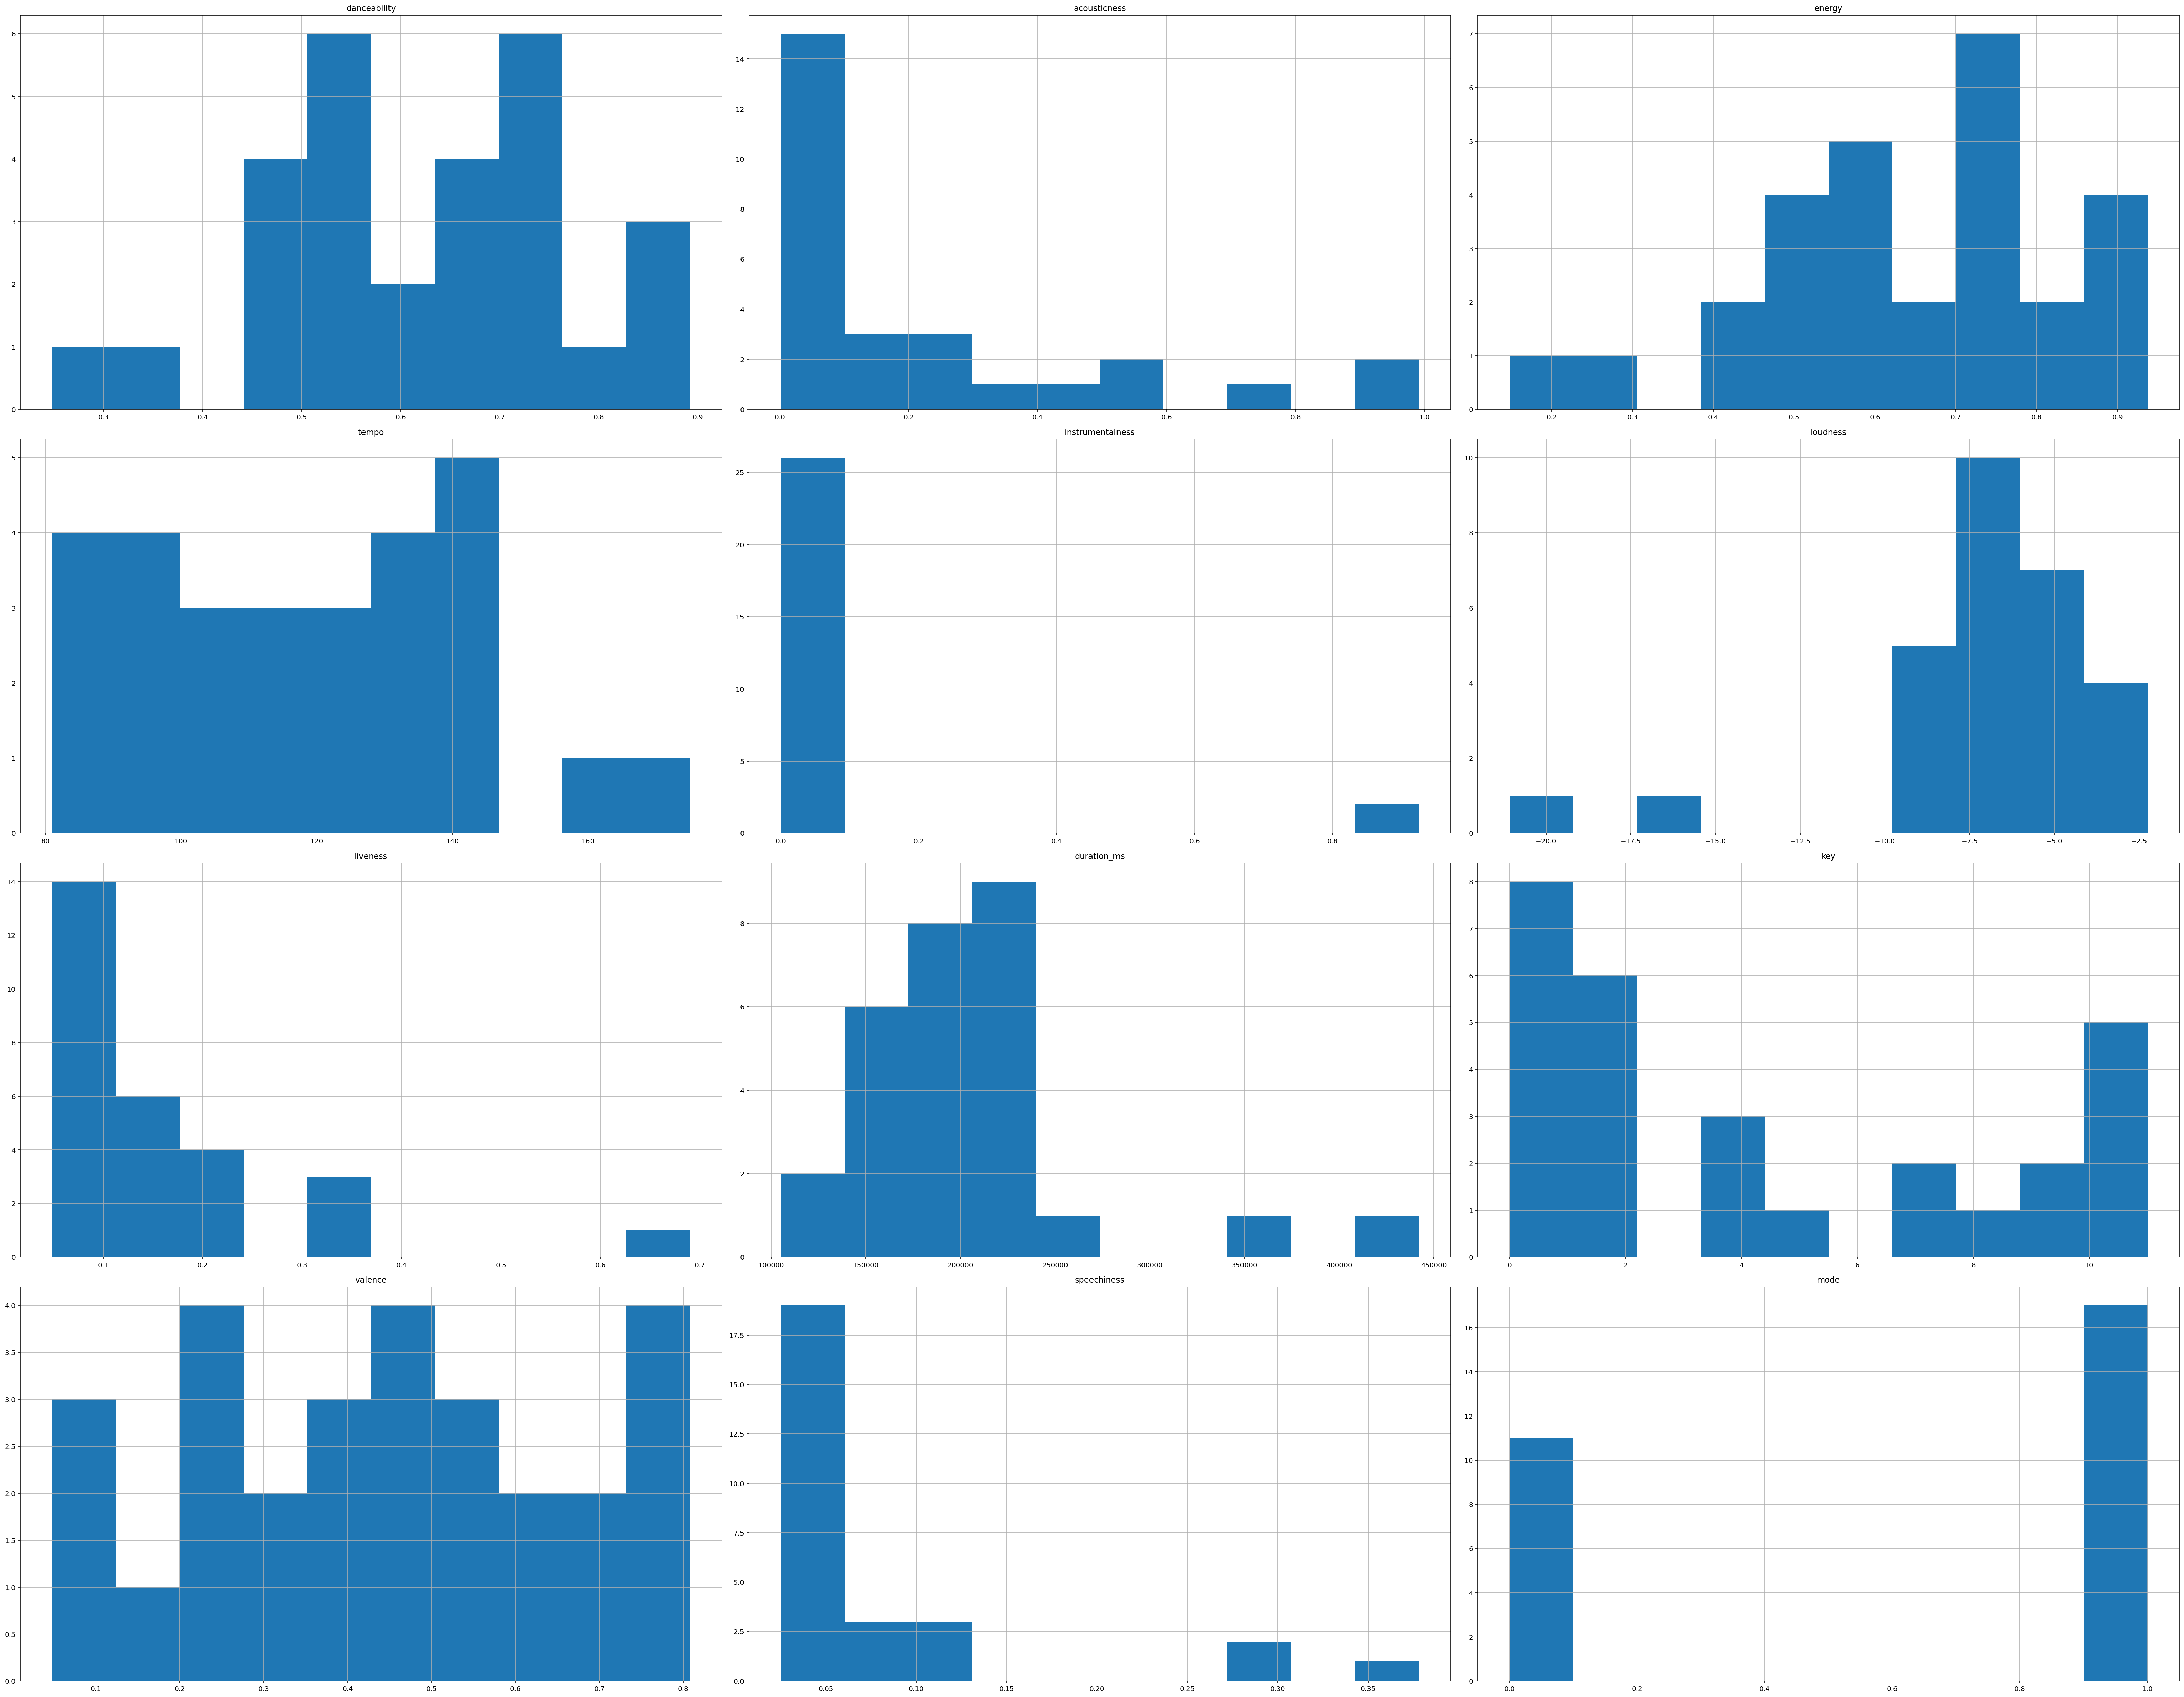

In [51]:
audio_features.hist(figsize=(45,35)) 
plt.tight_layout()
plt.show()

<AxesSubplot:>

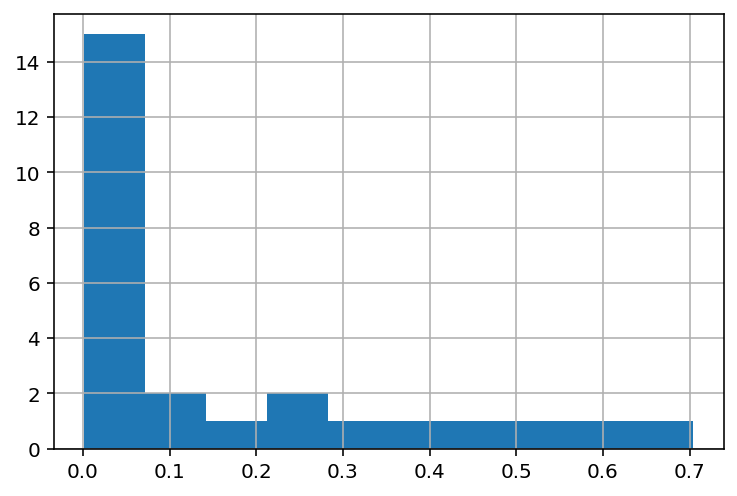

In [28]:
audio_features['acousticness'].hist() 

In [50]:
audio_features['instrumentalness'].iloc[25]

0.925

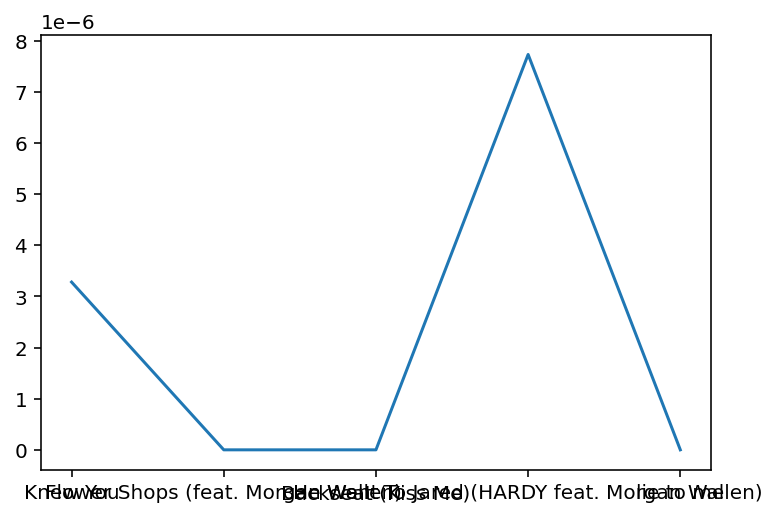

In [38]:
plt.plot(audio_features.head()['instrumentalness'])

## Features to encode

danceability
acousticness
energy
tempo
instrumentalness
loudness
liveness
duration_ms  
key
valence
speechiness
genres

In [148]:
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn import preprocessing

In [134]:
#Selecting numerical variables
nds = df.select_dtypes(include=['float64',"int64"])
numerical_features = ['danceability', 'acousticness', 'energy', 'instrumentalness','liveness','valence','mode']

##Features to scale
#features_to_be_scaled=nds.drop(columns=['danceability', 'acousticness', 'energy', 'instrumentalness','liveness','valence','mode'])
features_to_be_scaled=nds.drop(columns=numerical_features)


#Scaling Numerical variables
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

#Applying scaler on our data and converting i into a data frame
ndsmx = pd.DataFrame((scaler.fit_transform(features_to_be_scaled)))
ndsmx.columns=features_to_be_scaled.columns 
normalized_data_set=pd.concat([df[numerical_features].reset_index(drop=True),ndsmx.reset_index(drop=True)],axis=1)
normalized_data_set.set_index(df.index)

,danceability,acousticness,energy,instrumentalness,liveness,valence,mode,tempo,loudness,duration_ms,key,speechiness
track_name,,,,,,,,,,,,
Knew You,0.624,0.00725,0.562,0.000003,0.0937,0.4780,1,0.308193,0.776998,0.238205,0.000000,0.009634
Flower Shops (feat. Morgan Wallen),0.527,0.11800,0.461,0.000000,0.0831,0.2270,1,0.501718,0.806069,0.324291,0.636364,0.005101
Backseat (Kiss Me),0.750,0.11100,0.548,0.000000,0.0633,0.4970,1,0.213244,0.710619,0.180762,0.181818,0.068291
He Went To Jared (HARDY feat. Morgan Wallen),0.565,0.05400,0.806,0.000008,0.2040,0.6830,0,0.628618,0.848480,0.322177,0.818182,0.065458
lie to me,0.642,0.01510,0.392,0.000000,0.3520,0.0479,0,0.607143,0.703072,0.214545,0.363636,0.034287
Taste of You,0.667,0.00640,0.679,0.000053,0.1700,0.3200,1,0.202853,0.768442,0.185349,0.000000,0.063474
One of Them Nights,0.521,0.04220,0.883,0.000000,0.1050,0.8050,1,0.000000,0.917730,0.170249,0.090909,0.103429
Beggin',0.715,0.02840,0.796,0.000000,0.0658,0.4310,0,0.511152,0.860225,0.337063,0.363636,0.080193
come over,0.865,0.28900,0.498,0.000001,0.6900,0.8080,0,0.288027,0.678359,0.062086,0.636364,0.744970


<AxesSubplot:>

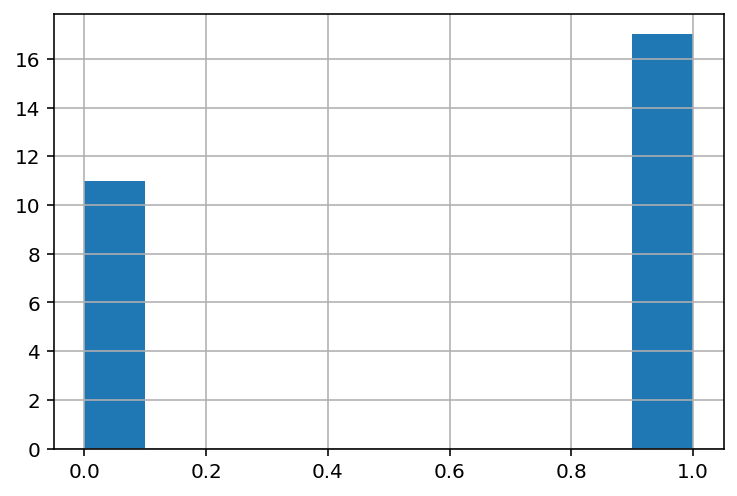

In [147]:
audio_features['mode'].hist()

In [145]:
for i in audio_features['instrumentalness']:
    if i > 10^(-3):
        print(i)
        #print(audio_features['instrumentalness'].loc[i])

3.28e-06
0.0
0.0
7.73e-06
0.0
5.28e-05
0.0
0.0
1.07e-06
0.0
1.94e-06
7.54e-05
0.0
0.000158
4.14e-06
0.0
0.0
0.0
1.08e-06
3.14e-05
0.00136
0.0
0.0
0.0817
5.75e-05
0.925
0.9
0.0


In [140]:
audio_features['instrumentalness']

track_name
Knew You                                                                   0.000003
Flower Shops (feat. Morgan Wallen)                                         0.000000
Backseat (Kiss Me)                                                         0.000000
He Went To Jared (HARDY feat. Morgan Wallen)                               0.000008
lie to me                                                                  0.000000
Taste of You                                                               0.000053
One of Them Nights                                                         0.000000
Beggin'                                                                    0.000000
come over                                                                  0.000001
The Reason                                                                 0.000000
Machine                                                                    0.000002
Three Feet Away                                                  